In [2]:
import pandas as pd
import numpy as np
import librosa
import wave as wav
from scipy import stats

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.callbacks.callbacks import EarlyStopping
from keras import regularizers
from keras.optimizers import adam
from keras.utils import to_categorical
import scipy
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import os
import statistics

import random
from random import randint

Using TensorFlow backend.


In [3]:
root = "respiratory_sound_database/"
sound_dir = root + "audio_and_txt_files/"
patient_diagnosis = pd.read_csv(root+"patient_diagnosis.csv", names=["patient", "diagnosis"])
demographic_info = pd.read_csv(root+"demographic_info.txt", delimiter=" ", names=["patient", "age", "sex", "bmi", "weight", "height"])
train_soundfiles = pd.read_csv(root+"train_soundfiles.csv")
test_soundfiles = pd.read_csv(root+"test_soundfiles.csv")

In [4]:
patient_diagnosis.set_index("patient", inplace=True)
train_soundfiles.set_index("filename", inplace=True)
test_soundfiles.set_index("filename", inplace=True)

In [5]:
train_soundfiles.head()

""
filename
101_1b1_Al_sc_Meditron.wav
101_1b1_Pr_sc_Meditron.wav
102_1b1_Ar_sc_Meditron.wav
104_1b1_Al_sc_Litt3200.wav
104_1b1_Ar_sc_Litt3200.wav


In [6]:
soundfiles = pd.concat([train_soundfiles, test_soundfiles])
soundfiles

""
filename
101_1b1_Al_sc_Meditron.wav
101_1b1_Pr_sc_Meditron.wav
102_1b1_Ar_sc_Meditron.wav
104_1b1_Al_sc_Litt3200.wav
104_1b1_Ar_sc_Litt3200.wav
...
224_1b2_Al_sc_Meditron.wav
225_1b1_Pl_sc_Meditron.wav
226_1b1_Al_sc_Meditron.wav


In [7]:
#Creating train feature set

In [8]:
class Config(object):
    def __init__(self, n_mfcc, max_frames, sample_rate, max_audio_duration, batch_size, epochs):
        self.n_mfcc = n_mfcc
        self.max_frames = max_frames
        self.sample_rate = sample_rate
        self.max_audio_duration = max_audio_duration
        self.max_audio_length = max_audio_duration * sample_rate
        self.batch_size = batch_size
        self.epochs = epochs

In [9]:
config = Config(n_mfcc=40, max_frames=862, sample_rate = 11025, max_audio_duration = 20, batch_size = 64,
epochs = 700)

# Preprocessing

In [10]:
def extract_features(filename, config):
    #print(filename) For debugging
    sound_root = root + "audio_and_txt_files/"
    raw, sr = librosa.load(sound_root + filename, duration=20, res_type="kaiser_fast")
    mfccs = librosa.feature.mfcc(y=raw, sr=sr, n_mfcc=config.n_mfcc, hop_length=512, fmin=50, fmax=2000)
    pad_width = config.max_frames - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0,0), (0, pad_width)), mode='constant')
    return mfccs

In [11]:
#Silences all sound segments longer than 25ms that have an amplitude less than 5% of max
def silence(raw, sr):
    minimum = raw.min()
    pos_raw = raw+abs(minimum)
    thresh = pos_raw.max()*0.05
    
    start = 0
    end = 0
    quiet_segment = False
    for idx, val in enumerate(raw):
        if val < thresh and quiet_segment == False:
            quiet_segment = True
            start = idx
        elif val < thresh and quiet_segment == True:
            continue
        elif val >= thresh and quiet_segment == True:
            end = idx
            if (end-start / sr > 0.025):
                raw[start:end] = abs(minimum)
            quiet_segment=False
        elif val >= thresh and quiet_segment == False:
            continue
            
    new_raw = pos_raw-abs(minimum)
    return new_raw

154_2b4_Pl_mc_AKGC417L.wav


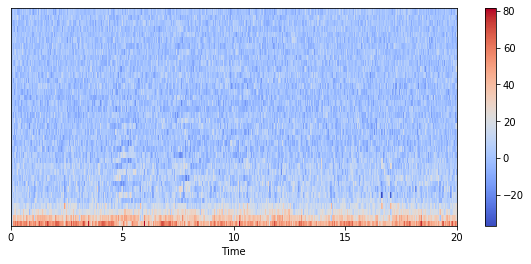

[[-546.64764   -546.64764   -546.64764   ... -286.8623    -289.67197
  -292.94394  ]
 [   0.           0.           0.        ...  112.28939    105.16373
   106.74376  ]
 [   0.           0.           0.        ...   61.456947    52.787937
    51.120117 ]
 ...
 [   0.           0.           0.        ...    5.2202296   -2.8576035
    -4.3707957]
 [   0.           0.           0.        ...   -0.9986781   -6.991159
   -11.324665 ]
 [   0.           0.           0.        ...    5.0589476    7.4100876
     7.800515 ]]
(40, 862)


In [12]:
sample_mfcc = extract_features("154_2b4_Pl_mc_AKGC417L.wav", config)

plt.figure(figsize=(10,4))
librosa.display.specshow(sample_mfcc[2:], x_axis='time')
plt.colorbar()
plt.show()

print(sample_mfcc)
print(sample_mfcc.shape)

COPD              566
Pneumonia          26
Healthy            24
URTI               14
Bronchiolitis       8
Bronchiectasis      7
Name: diagnosis, dtype: int64


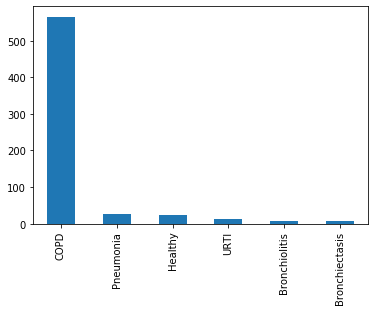

In [13]:
#See what's the distribution right now

train_diagnosis = []
for i, row in train_soundfiles.iterrows():
    patient = int(i.split("_")[0])
    diagnosis = patient_diagnosis.loc[patient]
    train_diagnosis.append(str(diagnosis[0]))
    
train_diagnosis = np.array(train_diagnosis)
train_diagnosis = pd.DataFrame(train_diagnosis, columns=["diagnosis"])
print(train_diagnosis.diagnosis.value_counts())
train_diagnosis.diagnosis.value_counts().plot(kind="bar")

In [14]:
#Iterate through all indexes and save those that have COPD

train_soundfiles.sort_values(by="filename", ascending=True, inplace=True)
copd_pats = [i
             for i, row in train_soundfiles.iterrows() 
             if patient_diagnosis.loc[int(i[:3])].diagnosis == 'COPD']
copd_pats

['104_1b1_Al_sc_Litt3200.wav',
 '104_1b1_Ar_sc_Litt3200.wav',
 '104_1b1_Ll_sc_Litt3200.wav',
 '104_1b1_Lr_sc_Litt3200.wav',
 '104_1b1_Pl_sc_Litt3200.wav',
 '104_1b1_Pr_sc_Litt3200.wav',
 '106_2b1_Pl_mc_LittC2SE.wav',
 '106_2b1_Pr_mc_LittC2SE.wav',
 '107_2b3_Al_mc_AKGC417L.wav',
 '107_2b3_Ar_mc_AKGC417L.wav',
 '107_2b3_Ll_mc_AKGC417L.wav',
 '107_2b3_Lr_mc_AKGC417L.wav',
 '107_2b3_Pl_mc_AKGC417L.wav',
 '107_2b3_Pr_mc_AKGC417L.wav',
 '107_2b3_Tc_mc_AKGC417L.wav',
 '107_2b4_Al_mc_AKGC417L.wav',
 '107_2b4_Ar_mc_AKGC417L.wav',
 '107_2b4_Ll_mc_AKGC417L.wav',
 '107_2b4_Lr_mc_AKGC417L.wav',
 '107_2b4_Pl_mc_AKGC417L.wav',
 '107_2b4_Pr_mc_AKGC417L.wav',
 '107_2b4_Tc_mc_AKGC417L.wav',
 '107_2b5_Al_mc_AKGC417L.wav',
 '107_2b5_Ar_mc_AKGC417L.wav',
 '107_2b5_Ll_mc_AKGC417L.wav',
 '107_2b5_Lr_mc_AKGC417L.wav',
 '107_2b5_Pl_mc_AKGC417L.wav',
 '107_2b5_Pr_mc_AKGC417L.wav',
 '107_2b5_Tc_mc_AKGC417L.wav',
 '107_3p2_Al_mc_AKGC417L.wav',
 '107_3p2_Ar_mc_AKGC417L.wav',
 '107_3p2_Ll_mc_AKGC417L.wav',
 '107_3p

In [15]:
copd_pats = pd.DataFrame(np.array(copd_pats), columns=["soundfile"])
copd_pats.set_index("soundfile", inplace=True)

### Extract MFCCs from soundfiles (X sets)

In [16]:
#Split patients into 5 folds

def get_patient_folds(n_folds = 5):
    n_folds = 5
    patients_list = list(patient_diagnosis.index)
    random_seed = random.Random(41)
    random_seed.shuffle(patients_list)
    fold_length = int(len(patients_list)/n_folds)
    patient_folds = []
    for i in range(n_folds-1):
        patient_folds += [patients_list[i*fold_length : (i+1)*fold_length]]
    patient_folds += [patients_list[(n_folds-1)*fold_length:]]
    return patient_folds

In [17]:
def get_soundfiles_for_patients(patient_list):
    patient_soundfiles = []
    for soundfile in soundfiles.index:
        soundfiles_patient = int(soundfile[:3])
        if (soundfiles_patient in patient_list):
            patient_soundfiles.append(soundfile)
    return patient_soundfiles

In [18]:
#Let's see what the data distribution is right now

def get_data_distribution(soundfiles, patient_diagnosis):
    train_diagnosis = []
    for i in soundfiles:
        patient = int(i.split("_")[0])
        diagnosis = get_patient_diagnosis(patient=patient)
        train_diagnosis.append(diagnosis)

    train_diagnosis = np.array(train_diagnosis)
    train_diagnosis = pd.DataFrame(train_diagnosis, columns=["diagnosis"])
    return train_diagnosis.diagnosis.value_counts()

In [19]:
#Given the patient number, return their diagnosis
def get_patient_diagnosis(patient):
    return patient_diagnosis.loc[patient].diagnosis

In [20]:
#Input is the audio time series
def extract_features_from_sound(raw, config, verbose = 0):
    if (verbose == 1):
        print("Extracting features from sound...")
        print("Length of raw is", len(raw))
        
    max_audio_length = config.max_audio_length
    
    #Random padding
    if len(raw) < config.max_audio_length:
        maximum_padding = config.max_audio_length - len(raw)
        begin_padding = randint(a = 0, b = maximum_padding)
        end_padding = maximum_padding - begin_padding
        raw = np.pad(raw, pad_width=(begin_padding, end_padding), mode="constant")
    if (verbose == 1):
        print(len(raw))
    mfccs = librosa.feature.mfcc(y=raw, sr=config.sample_rate, n_mfcc=config.n_mfcc, hop_length=512, fmin=50, fmax=2000) 
    
    if (verbose == 1):
        print("Padding complete, length of raw is", len(raw))
        print("Padding, complete, shape of MFCCs is", np.array(mfccs).shape)
        print("Features from sound extracted!")
        
    return mfccs

In [21]:
def get_data_for_cnn(soundfiles, directory, verbose = 0):
    all_features = [] #X
    all_diagnosis = [] #y
        
    for soundfile in soundfiles:
        raw, sr = librosa.load(directory + soundfile, sr=config.sample_rate, duration=config.max_audio_duration)
        if (verbose == 1):
            print("Soundfile", soundfile)
            print("Sample rate is", sr)
            print("Just loaded sound. Length is", len(raw))
                    
        if (verbose == 1):
            print("Exctracting features...")
        features = extract_features_from_sound(raw, config, verbose = verbose)
        all_features.append(features)
        
        diagnosis = get_patient_diagnosis(int(soundfile[:3]))
        all_diagnosis.append(diagnosis)
        
        if(verbose ==1):
            print("Features extracted!")
                
    X = np.expand_dims(np.array(all_features), -1)
    return X, all_diagnosis


In [ ]:
#Generating data
#We have split the patients into 5 folds already here
#And will generate data separately for each fold
#Alternatively it is possible to modify the code and generate data for all patients at once
#And then split them info folds later

patient_folds = get_patient_folds()
all_results = []

for i in range(5):
    print("We're at fold", i+1)
    test_patients = patient_folds[i]
    train_patients = patient_folds.copy()
    del train_patients[i]
    train_patients = [item for sublist in train_patients for item in sublist] #flatten list
    
    test_soundfiles = get_soundfiles_for_patients(test_patients)
    train_soundfiles = get_soundfiles_for_patients(train_patients)

    X_train, labels_train = get_data_for_cnn(train_soundfiles, sound_dir)
    X_test, labels_test = get_data_for_cnn(test_soundfiles, sound_dir)
    
    all_labels = labels_train + labels_test
    test_labels_start = len(labels_train)
    factorized_labels, classes = pd.factorize(all_labels)
    print(classes)
    categorical_labels = to_categorical(factorized_labels)
    y_train = categorical_labels[:test_labels_start]
    y_test = categorical_labels[test_labels_start:]
    
    np.save(root + "dataframes/X_train_no_aug_04_08_split_" + str(i), X_train)
    np.save(root + "dataframes/X_test_no_aug_04_08_split_" + str(i), X_test)
    np.save(root + "dataframes/y_train_no_aug_04_08_split_" + str(i), y_train)
    np.save(root + "dataframes/y_test_no_aug_04_08_split_" + str(i), y_test)